In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [15]:
file3 = "../output/bc_vs_bf_clean.csv"
df3 = pd.read_csv(file3,sep=",")

In [16]:
df3 = df3[df3["metric"]=="BF"]
df_box3 = df3[["num diffs","coverage","k-length","score"]]
df_box3["num diffs"] = df_box3["num diffs"]/2000000
df3["score"] = 1-df3["score"]

/tmp/ipykernel_658756/1463902471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box3["num diffs"] = df_box3["num diffs"]/2000000


In [17]:
# df_box3 = pd.DataFrame(df, columns=["num diffs","coverage","score","k-length"])
# df_box3.boxplot(by=["coverage","k-length"])
df_box3.groupby(["coverage","k-length"]).corr()

num diffs     score
coverage k-length                               
10.0     10.0     num diffs   1.000000 -0.878937
                  score      -0.878937  1.000000
         20.0     num diffs   1.000000 -0.948442
                  score      -0.948442  1.000000
         30.0     num diffs   1.000000 -0.883086
                  score      -0.883086  1.000000
         40.0     num diffs   1.000000 -0.861718
                  score      -0.861718  1.000000
20.0     10.0     num diffs   1.000000 -0.420380
                  score      -0.420380  1.000000
         20.0     num diffs   1.000000 -0.565580
                  score      -0.565580  1.000000
         30.0     num diffs   1.000000 -0.347387
                  score      -0.347387  1.000000
         40.0     num diffs   1.000000 -0.310140
                  score      -0.310140  1.000000
30.0     10.0     num diffs   1.000000 -0.926817
                  score      -0.926817  1.000000
         20.0     num diffs   1.000000 -0.658661
                  score      -0.658661  1.000000
         30.0     num diffs   1.000000 -0.764272
                  score      -0.764272  1.000000
         40.0     num diffs   1.000000 -0.887842
                  score      -0.887842  1.000000
40.0     10.0     num diffs   1.000000 -0.815806
                  score      -0.815806  1.000000
         20.0     num diffs   1.000000 -0.741782
                  score      -0.741782  1.000000
         30.0     num diffs   1.000000 -0.690879
                  score      -0.690879  1.000000
         40.0     num diffs   1.000000 -0.841027
                  score      -0.841027  1.000000

/tmp/ipykernel_658756/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_658756/593733237.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_658756/593733237.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Coeff: 10
[-1.21263044]
Coeff: 20
[-6.89244225]
Coeff: 30
[-9.05585869]
Coeff: 40
[-9.28055425]


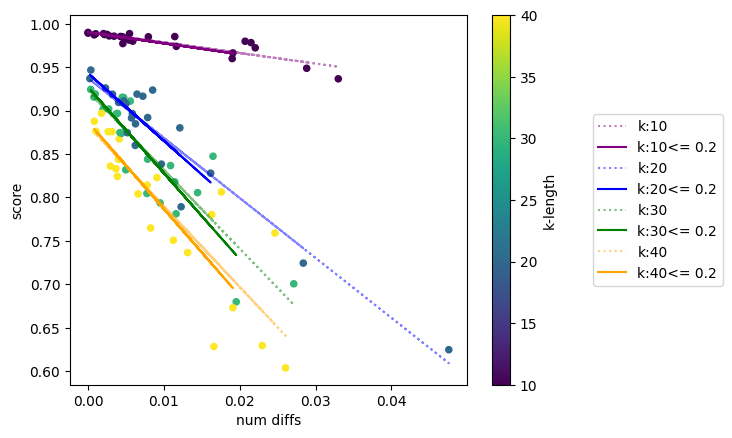

In [18]:
cov_10 = df_box3[df_box3["coverage"]==10]
# cov_10
fig, ax = plt.subplots()
cov_10.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_10[cov_10["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_658756/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_658756/903538148.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_658756/903538148.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Coeff: 10
[-0.2188316]
Coeff: 20
[-5.40052703]
Coeff: 30
[-2.77363746]
Coeff: 40
[-6.24490231]


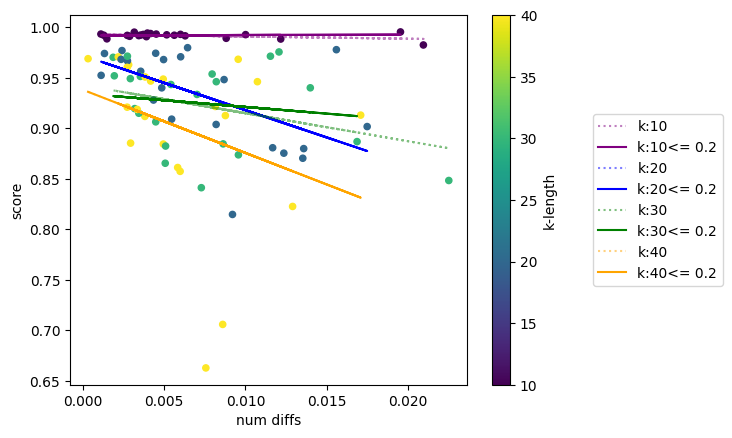

In [19]:
cov_20 = df_box3[df_box3["coverage"]==20]

# cov_20
fig, ax = plt.subplots()
cov_20.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_20[cov_20["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_658756/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_658756/2217191788.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_658756/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[-0.8875118]
Coeff: 20
[-4.55875764]
Coeff: 30
[-7.36204456]
Coeff: 40
[-11.86846705]


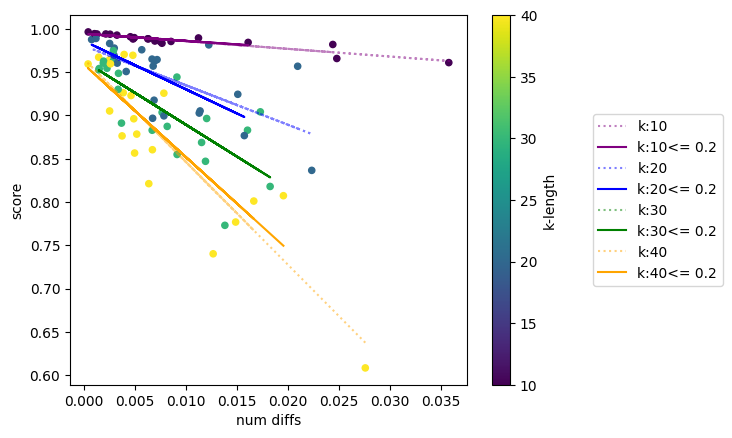

In [20]:
cov_30 = df_box3[df_box3["coverage"]==30]
# cov_10
fig, ax = plt.subplots()
cov_30.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_30[cov_30["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_658756/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_658756/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_658756/1260264352.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Coeff: 10
[-1.54477542]
Coeff: 20
[-4.6588327]
Coeff: 30
[-5.82867772]
Coeff: 40
[-11.22238888]


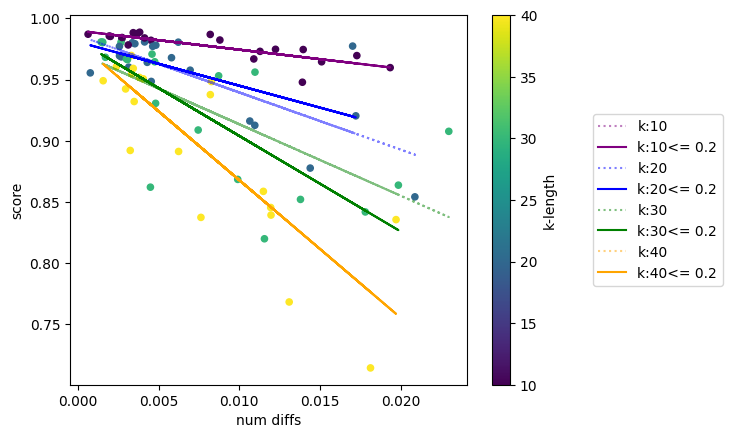

In [21]:
cov_40 = df_box3[df_box3["coverage"]==40]

# cov_10
fig, ax = plt.subplots()
cov_40.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_40[cov_40["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [22]:
klength_10 = df_box3[df_box3["k-length"]==10]
klength_10

,num diffs,coverage,k-length,score
0,0.000000,10.0,10.0,0.989085
1,0.000000,10.0,10.0,0.989864
2,0.000802,10.0,10.0,0.987073
6,0.003904,20.0,10.0,0.990913
10,0.004930,30.0,10.0,0.989810
...,...,...,...,...
335,0.003426,10.0,10.0,0.985551
339,0.003714,20.0,10.0,0.993116
343,0.002556,30.0,10.0,0.993766
347,0.002720,40.0,10.0,0.984350


/tmp/ipykernel_658756/3764074011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3764074011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3764074011.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[-1.21263044]
Coeff: 20
[-0.2188316]
Coeff: 30
[-0.8875118]
Coeff: 40
[-1.54477542]


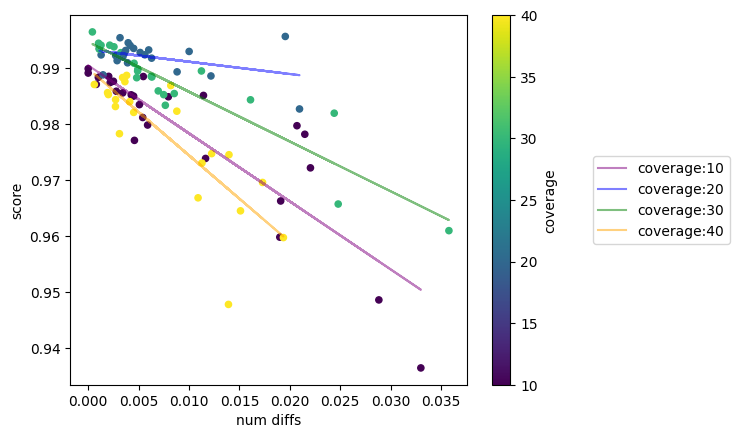

In [23]:
klength_10 = df_box3[df_box3["k-length"]==10]
# cov_10
fig, ax = plt.subplots()
klength_10.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_10[klength_10["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_658756/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[-6.89244225]
Coeff: 20
[-5.40052703]
Coeff: 30
[-4.55875764]
Coeff: 40
[-4.6588327]


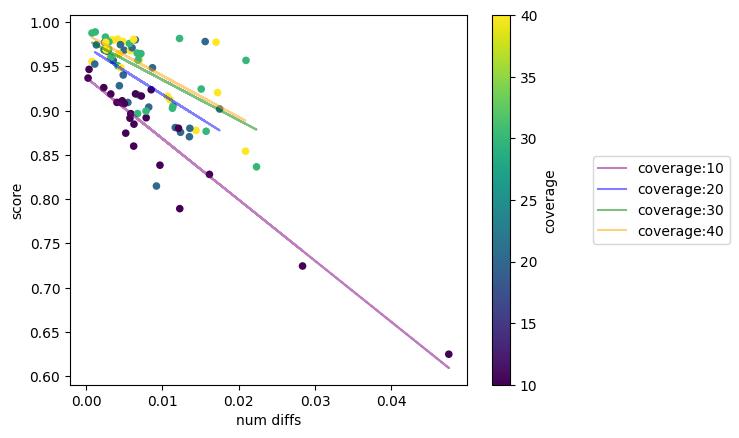

In [24]:
klength_20 = df_box3[df_box3["k-length"]==20]
# cov_10
fig, ax = plt.subplots()
klength_20.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_20[klength_20["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_658756/3822261643.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3822261643.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3822261643.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[-9.05585869]
Coeff: 20
[-2.77363746]
Coeff: 30
[-7.36204456]
Coeff: 40
[-5.82867772]


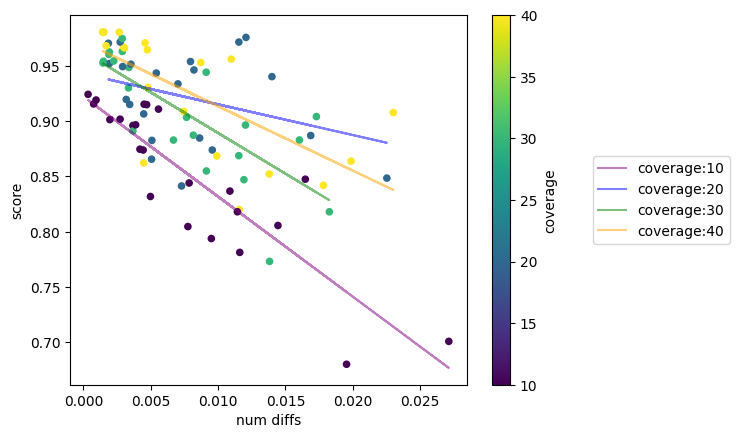

In [25]:
klength_30 = df_box3[df_box3["k-length"]==30]
# cov_10
fig, ax = plt.subplots()
klength_30.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_30[klength_30["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_658756/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_658756/3534754393.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Coeff: 10
[-9.28055425]
Coeff: 20
[-6.24490231]
Coeff: 30
[-11.86846705]
Coeff: 40
[-11.22238888]


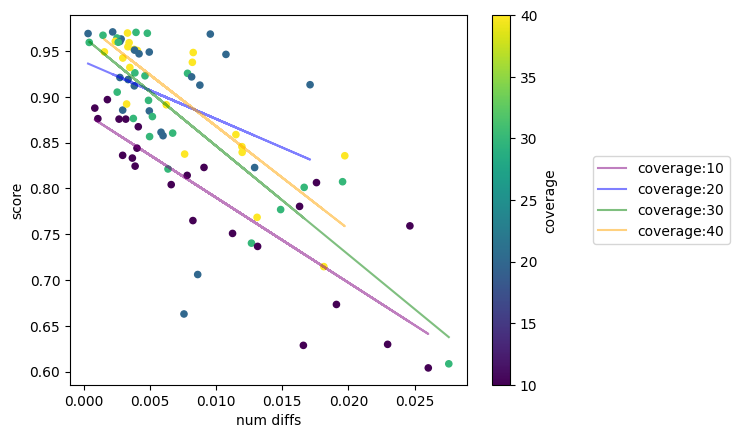

In [26]:
klength_40 = df_box3[df_box3["k-length"]==40]
# cov_10
fig, ax = plt.subplots()
klength_40.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_40[klength_40["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()